Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. 
Целевой переменной при обучении является переменная species. 
При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. 
Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)
np.random.seed(0)
my_awesome_tree = DecisionTreeClassifier(...)
или
my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

In [15]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn import metrics as skm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70%; !important;}</style>"
HTML(style)

In [18]:
# Import train
data_train = pd.read_csv("C:\\Users\\Asus\\Downloads\\train_iris.csv", index_col = 0)
data_train.head()
#data_train.iloc[:, 2]
# Unnamed: 0
#data_train.index
#data_train.columns

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [19]:
# Import test
data_test = pd.read_csv("C:\\Users\\Asus\\Downloads\\test_iris.csv", index_col = 0)
data_test.head()
#data_test.shape

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [26]:
X_train = data_train.drop(['species'], axis = 1)
X_test  = data_test.drop(['species'], axis = 1)
y_train = data_train.species
y_test =  data_test.species
X_train.head()
y_train.head()

130    2
7      0
11     0
142    2
109    2
Name: species, dtype: int64

In [27]:
y_test.shape

(50,)

In [28]:
# Fit tree with different depth size

rs = np.random.seed(0)
scores = pd.DataFrame()
max_depth_values = range(1,100)

for max_depth in max_depth_values:
    
    clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = max_depth)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score =   clf.score (X_test,  y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    tmp_score_data = pd.DataFrame({'max_depth':       [max_depth],
                                   'train_score':     [train_score],
                                   'test_score':      [test_score],
                                   'cross_val_score': [mean_cross_val_score] })
    scores = pd.concat([scores,tmp_score_data], axis = 0)
            

In [29]:
scores.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.94,0.96
0,5,1.00,0.92,0.96


In [30]:
scores_long = pd.melt(scores, 
                      id_vars = ['max_depth'],
                      value_vars = ['train_score','test_score','cross_val_score'],
                      var_name = 'set_type',
                      value_name = 'score')
scores_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
292,95,cross_val_score,0.96
293,96,cross_val_score,0.96
294,97,cross_val_score,0.96
295,98,cross_val_score,0.96


<AxesSubplot: xlabel='max_depth', ylabel='score'>

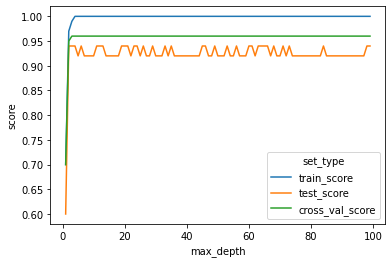

In [31]:
sns.lineplot(x='max_depth', y ='score', hue = 'set_type', data = scores_long)